## Fraud Detection Model
https://www.kaggle.com/competitions/ieee-fraud-detection/data

In [1]:
import pandas as pd
import numpy as np

In [2]:
test_data = pd.read_csv('./Data/test_combined.csv')
test_data.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train_data = pd.read_csv('./Data/train_combined.csv')
train_data.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [16]:
exclude_columns = {"TransactionID", "isFraud", "TransactionDT", "TransactionAmt"}

with open("unique_values.txt", "w") as file:
    for col in train_data.columns:
        if col not in exclude_columns:
            unique_vals = train_data[col].unique() 
            unique_vals_str = ", ".join(map(str, unique_vals))  
            file.write(f"{col}: {unique_vals_str}\n")  


### Feature Selection base on domain knowledge
Since M (Matching Feature), C (Masked Count Feature), D (Temporal Data) and V (Engineered Feature) are masked values, I will use variance analysis for these columns if the values are redundant or highly sparse/low variance.

In [38]:
M_features = [f"M{i}" for i in range(1, 10)]      
C_features = [f"C{i}" for i in range(1, 15)]       
D_features = [f"D{i}" for i in range(1, 16)]       
V_features = [f"V{i}" for i in range(1, 340)]
masked_col = M_features + C_features + D_features + V_features
sparse_features = []

sparsity_threshold = 0.95
for col in masked_col:
    missing_ratio = train_data[col].isna().mean()  
    zero_ratio = (train_data[col] == 0).mean()  
    
    total_sparsity = missing_ratio + zero_ratio  
    
    if total_sparsity > sparsity_threshold:
        sparse_features.append(col)

print("Highly sparse features:", sparse_features)

Highly sparse features: ['C3', 'D6', 'D7', 'D12', 'D13', 'D14', 'V27', 'V28', 'V68', 'V89', 'V104', 'V135', 'V138', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V169', 'V172', 'V173', 'V174', 'V175', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V220', 'V223', 'V224', 'V225', 'V226', 'V227', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V281', 'V286', 'V297', 'V300', 'V301', 'V311', 'V319', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']


Numeric and Categorical Feature split

In [30]:
numerical_features = train_data.select_dtypes(include=[np.number])
categorical_features = train_data.select_dtypes(exclude=[np.number])

print(numerical_features.columns)
print(categorical_features.columns)
print(len(numerical_features.columns) + len(categorical_features.columns) == len(train_data.columns))

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1',
       'card2', 'card3', 'card5', 'addr1', 'addr2',
       ...
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25',
       'id_26', 'id_32'],
      dtype='object', length=403)
Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')
True


In [33]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

variance_threshold = 0.01
selector = VarianceThreshold(threshold=variance_threshold)
exclude_columns = {"TransactionID", "isFraud", "TransactionDT", "TransactionAmt"}

numerical_features.drop(columns=exclude_columns, errors='ignore')
selector.fit(numerical_features)
low_variance_features = numerical_features.columns[~selector.get_support()].tolist()

print("Low variance features:", low_variance_features)

Low variance features: ['V1', 'V14', 'V27', 'V28', 'V41', 'V65', 'V68', 'V88', 'V89', 'V107', 'V108', 'V110', 'V111', 'V112', 'V113', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V240', 'V241', 'V305']


c:\Users\Henry\Vs Code Projects\Real-Time-Fraud-Detection-Pipeline\Fraud-Detection-Analysis\.venv\Lib\site-packages\numpy\_core\fromnumeric.py:4316: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


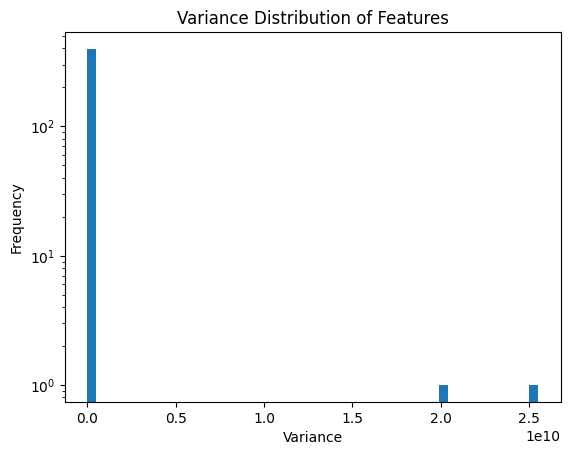

In [37]:
variances = np.var(numerical_features)

plt.hist(variances, bins=50, log=True)
plt.xlabel("Variance")
plt.ylabel("Frequency")
plt.title("Variance Distribution of Features")
plt.show()

Dropping irrelevant models (Test 1)

In [ ]:
features_to_drop = sparse_features + low_variance_features

Fine-Tune Baseline Model

1. Categorical Features - Transaction
    - ProductCD
    - card1 - card6
    - addr1, addr2
    - P_emaildomain
    - R_emaildomain
    - M1 - M9
2. Categorical Features - Identity
    - DeviceType
    - DeviceInfo
    - id_12 - id_38

In [16]:
print(train_data.columns)
print("ProductCD:", train_data['ProductCD'].unique(), "Count:", len(train_data['ProductCD'].unique()))
print("card1:", train_data['card1'].unique(), "Count:", len(train_data['card1'].unique()))
print("card2:", train_data['card2'].unique(), "Count:", len(train_data['card2'].unique()))
print("card3:", train_data['card3'].unique(), "Count:", len(train_data['card3'].unique()))
print("card4:", train_data['card4'].unique(), "Count:", len(train_data['card4'].unique()))
print("card5:", train_data['card5'].unique(), "Count:", len(train_data['card5'].unique()))
print("card6:", train_data['card6'].unique(), "Count:", len(train_data['card6'].unique()))
print("addr1:", train_data['addr1'].unique(), "Count:", len(train_data['addr1'].unique()))
print("addr2:", train_data['addr2'].unique(), "Count:", len(train_data['addr2'].unique()))
print("P_emaildomain:", train_data['P_emaildomain'].unique(), "Count:", len(train_data['P_emaildomain'].unique()))
print("R_emaildomain:", train_data['R_emaildomain'].unique(), "Count:", len(train_data['R_emaildomain'].unique()))
print("M1:", train_data['M1'].unique(), "Count:", len(train_data['M1'].unique()))
print("M2:", train_data['M2'].unique(), "Count:", len(train_data['M2'].unique()))
print("M3:", train_data['M3'].unique(), "Count:", len(train_data['M3'].unique()))
print("M4:", train_data['M4'].unique(), "Count:", len(train_data['M4'].unique()))
print("M5:", train_data['M5'].unique(), "Count:", len(train_data['M5'].unique()))
print("M6:", train_data['M6'].unique(), "Count:", len(train_data['M6'].unique()))
print("M7:", train_data['M7'].unique(), "Count:", len(train_data['M7'].unique()))
print("M8:", train_data['M8'].unique(), "Count:", len(train_data['M8'].unique()))
print("M9:", train_data['M9'].unique(), "Count:", len(train_data['M9'].unique()))
print("DeviceType:", train_data['DeviceType'].unique(), "Count:", len(train_data['DeviceType'].unique()))
print("DeviceInfo:", train_data['DeviceInfo'].unique(), "Count:", len(train_data['DeviceInfo'].unique()))
print("id_12:", train_data['id_12'].unique(), "Count:", len(train_data['id_12'].unique()))
print("id_13:", train_data['id_13'].unique(), "Count:", len(train_data['id_13'].unique()))
print("id_14:", train_data['id_14'].unique(), "Count:", len(train_data['id_14'].unique()))
print("id_15:", train_data['id_15'].unique(), "Count:", len(train_data['id_15'].unique()))
print("id_16:", train_data['id_16'].unique(), "Count:", len(train_data['id_16'].unique()))
print("id_17:", train_data['id_17'].unique(), "Count:", len(train_data['id_17'].unique()))
print("id_18:", train_data['id_18'].unique(), "Count:", len(train_data['id_18'].unique()))
print("id_19:", train_data['id_19'].unique(), "Count:", len(train_data['id_19'].unique()))
print("id_20:", train_data['id_20'].unique(), "Count:", len(train_data['id_20'].unique()))
print("id_21:", train_data['id_21'].unique(), "Count:", len(train_data['id_21'].unique()))
print("id_22:", train_data['id_22'].unique(), "Count:", len(train_data['id_22'].unique()))
print("id_23:", train_data['id_23'].unique(), "Count:", len(train_data['id_23'].unique()))
print("id_24:", train_data['id_24'].unique(), "Count:", len(train_data['id_24'].unique()))
print("id_25:", train_data['id_25'].unique(), "Count:", len(train_data['id_25'].unique()))
print("id_26:", train_data['id_26'].unique(), "Count:", len(train_data['id_26'].unique()))
print("id_27:", train_data['id_27'].unique(), "Count:", len(train_data['id_27'].unique()))
print("id_28:", train_data['id_28'].unique(), "Count:", len(train_data['id_28'].unique()))
print("id_29:", train_data['id_29'].unique(), "Count:", len(train_data['id_29'].unique()))
print("id_30:", train_data['id_30'].unique(), "Count:", len(train_data['id_30'].unique()))
print("id_31:", train_data['id_31'].unique(), "Count:", len(train_data['id_31'].unique()))
print("id_32:", train_data['id_32'].unique(), "Count:", len(train_data['id_32'].unique()))
print("id_33:", train_data['id_33'].unique(), "Count:", len(train_data['id_33'].unique()))
print("id_34:", train_data['id_34'].unique(), "Count:", len(train_data['id_34'].unique()))
print("id_35:", train_data['id_35'].unique(), "Count:", len(train_data['id_35'].unique()))
print("id_36:", train_data['id_36'].unique(), "Count:", len(train_data['id_36'].unique()))
print("id_37:", train_data['id_37'].unique(), "Count:", len(train_data['id_37'].unique()))
print("id_38:", train_data['id_38'].unique(), "Count:", len(train_data['id_38'].unique()))



Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)
ProductCD: ['W' 'H' 'C' 'S' 'R'] Count: 5
card1: [13926  2755  4663 ... 13166  8767 18038] Count: 13553
card2: [ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 

Columns with too much unique values are hard to intepret.

In [18]:
train_data = train_data.drop(columns=['dist1', 'dist2', 'id_13', 'id_14', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_27', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'M4'])
print(train_data.columns)
train_data

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_10', 'id_11', 'id_12', 'id_15', 'id_16', 'id_23', 'id_28', 'id_29',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=410)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_10,id_11,id_12,id_15,id_16,id_23,id_28,id_29,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,NaN,100.0,NotFound,New,NotFound,NaN,New,NotFound,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Fine-tune Fraud Detection Model (Micro-Fraud Payments, Geolocation Fraud)
1. Microfraud payment

In [20]:
fdd1_train = train_data
fdd1_train.drop(columns=['addr1', 'addr2'])
fdd1_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_10,id_11,id_12,id_15,id_16,id_23,id_28,id_29,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,NaN,100.0,NotFound,New,NotFound,NaN,New,NotFound,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
